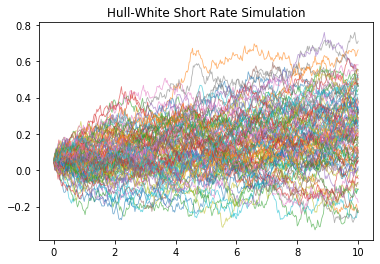

[[0.05       0.0497717  0.04824695 ... 0.29144802 0.29931242 0.34885623]
 [0.05       0.07464199 0.09265859 ... 0.1654317  0.16900642 0.16704153]
 [0.05       0.03465857 0.0371186  ... 0.17667913 0.15958144 0.14862097]
 ...
 [0.05       0.05940976 0.06859293 ... 0.69886287 0.69827635 0.71033055]
 [0.05       0.03197008 0.02170249 ... 0.21434821 0.22941274 0.21167322]
 [0.05       0.05542123 0.06971319 ... 0.43056014 0.39657019 0.39185801]]


In [15]:
import QuantLib as ql
import matplotlib.pyplot as plt
import numpy as np

sigma = 0.1
a = 0.1
timestep = 360
length = 10 # in years
forward_rate = 0.05
day_count = ql.Thirty360()
todays_date = ql.Date(11, 5, 2020)

ql.Settings.instance().evaluationDate = todays_date

spot_curve = ql.FlatForward(todays_date, ql.QuoteHandle(ql.SimpleQuote(forward_rate)), day_count)
spot_curve_handle = ql.YieldTermStructureHandle(spot_curve)

hw_process = ql.HullWhiteProcess(spot_curve_handle, a, sigma)
rng = ql.GaussianRandomSequenceGenerator(ql.UniformRandomSequenceGenerator(timestep, ql.UniformRandomGenerator()))
seq = ql.GaussianPathGenerator(hw_process, length, timestep, rng, False)

def generate_paths(num_paths, timestep):
    arr = np.zeros((num_paths, timestep+1))
    for i in range(num_paths):
        sample_path = seq.next()
        path = sample_path.value()
        time = [path.time(j) for j in range(len(path))]
        value = [path[j] for j in range(len(path))]
        arr[i, :] = np.array(value)
    return np.array(time), arr

num_paths = 100
time, paths = generate_paths(num_paths, timestep)
for i in range(num_paths):
    plt.plot(time, paths[i, :], lw=0.8, alpha=0.6)
plt.title("Hull-White Short Rate Simulation")
plt.show()
print(paths)





In [12]:
#代入GBM
# State Variables


dt = 0.01
#mu = 0.01*dt # Rendite pro Zeiteinheit

S0 = 100
np.random.seed(1)
n = round(length/dt)
W = [0]
for j in range(paths):
            W.append(np.random.standard_normal(size = n) ) 

def genBrownPath (length, mu, sigma, S0, dt):
    for i in range(paths):
        t = np.linspace(0, length, n)
        W = np.cumsum(W)*np.sqrt(dt) # == standard brownian motion
        X.append((mu-0.5*sigma**2)*t + sigma*W )
        S = S0*np.exp(X) # == geometric brownian motion
        plt.plot(t, S)
    return S

paths = []
for i in range(0,num_paths-1):
    plt.plot(time, paths[i, :], lw=0.8, alpha=0.6)
    paths.append(genBrownPath(length, mu, sigma, S0, dt))
plt.show()

TypeError: list indices must be integers or slices, not tuple